✓ Namespaces configured
✓ Knowledge graph initialized with 0 triples
✓ Ontology loaded: 16484 triples

CONVERTING PAPERS WITH CODE DATA
✓ Papers with Code data converted
  Total triples: 16588

CONVERTING GITHUB ARCHIVE DATA
✓ GitHub Archive data converted
  Total triples: 16620

QUERYING DBPEDIA FOR AI FRAMEWORKS
  Queried: PyTorch - found 1 results
  Queried: TensorFlow - found 1 results
  Queried: Keras - found 1 results
  Queried: Scikit-learn - found 1 results
✓ DBpedia data integrated
  Frameworks aligned: 4
  Total triples: 16636

QUERYING WIKIDATA FOR MODEL ARCHITECTURES
✓ Wikidata data integrated
  Architectures aligned: 1
  Total triples: 16639

LINKING MODELS TO ARCHITECTURES
✓ Models linked to architectures
  Total triples: 16643

ADDING BENCHMARK RESULTS
✓ Benchmark results added
  Total triples: 16663

SAVING KNOWLEDGE GRAPH
✓ Knowledge graph saved to: instances.ttl
  Final triple count: 16663

Sample triples from the knowledge graph:
-------------------------------------

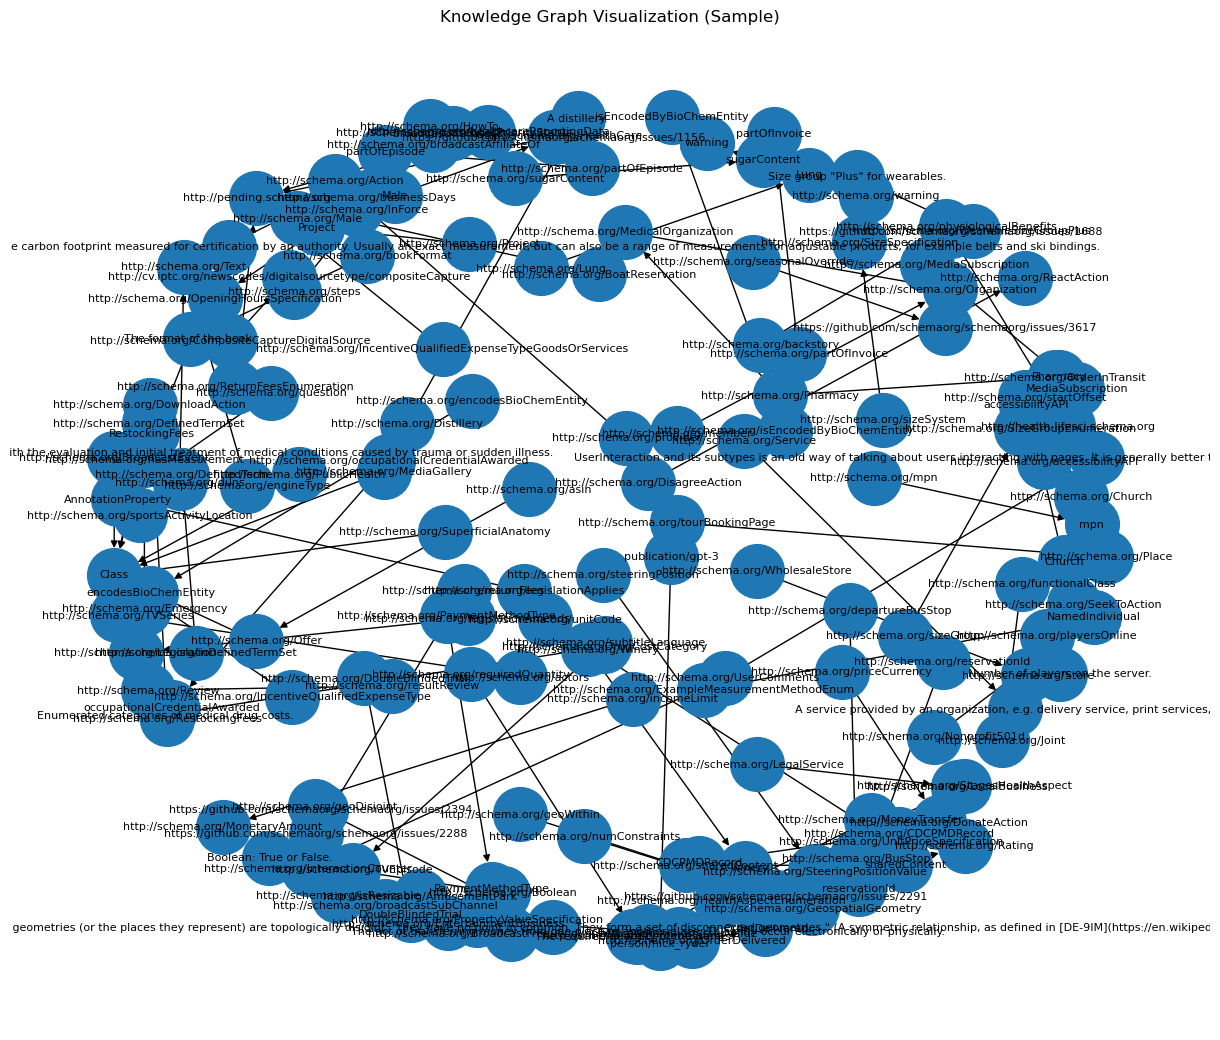


APPLYING REASONING AND VALIDATION
Triples before reasoning: 16663
✓ Found 10 publication-author connections
✓ Found 4 model-framework relationships
✓ Validated 4 model-architecture links (R1 constraint)
✓ Validated 2 benchmark-dataset links (R2 constraint)

ANALYZING COMPETENCY QUESTIONS

--- CQ1: Time Lag Between Research and Implementation ---
✓ Analyzed 3 model releases
     modelName  pubYear  relYear  yearDiff
0    ResNet-50     2015     2023         8
1   ResNet-101     2015     2023         8
2  Transformer     2017     2020         3

📊 Key Finding: Average time lag = 6.3 years
   Range: 3 to 8 years
✓ Saved: cq1_time_lag.png


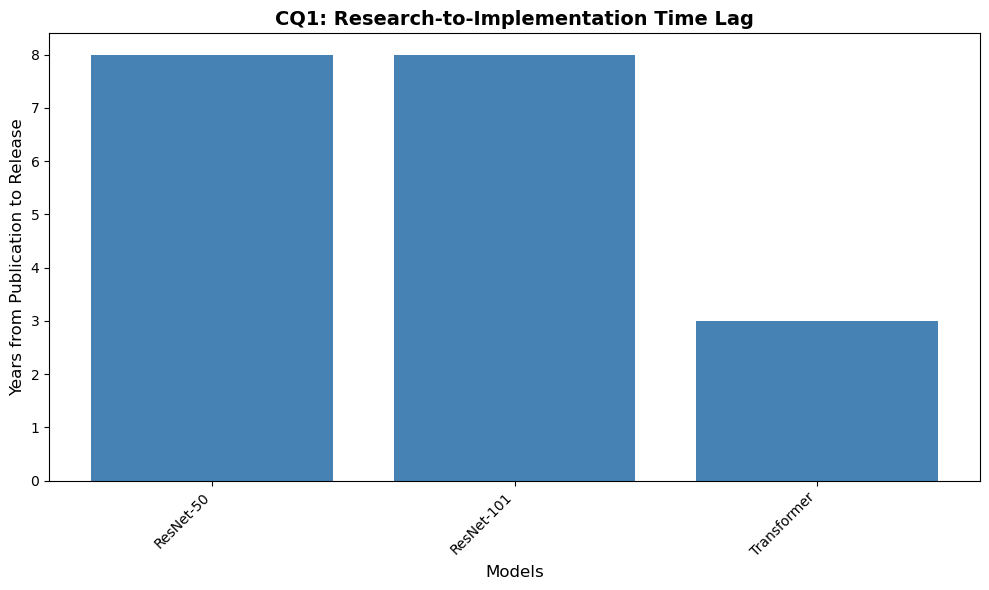


--- CQ2: Framework Adoption Patterns ---
  frameworkName  modelCount
0       PyTorch           3
1    TensorFlow           1

📊 Key Finding: Most adopted framework = PyTorch with 3 models
✓ Saved: cq2_framework_adoption.png


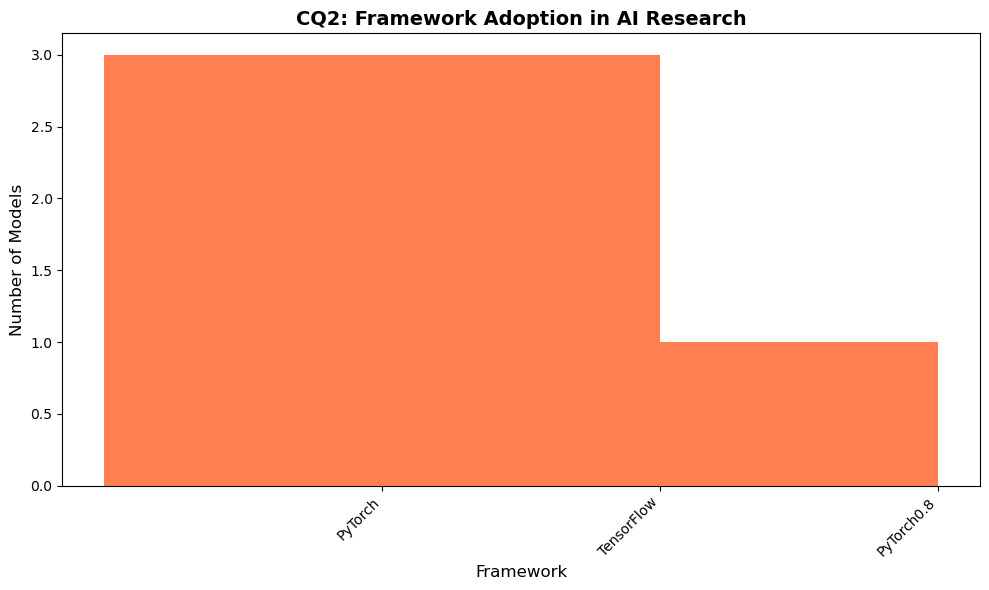


--- CQ3: Breakthrough Model Characteristics ---
⚠ No data found for CQ3

ADDITIONAL INSIGHTS

Repository Popularity:
                   repoName  stars  forks
0  huggingface/transformers  98765  23456
1            pytorch/vision  15234   6789
2  tensorflow/tensor2tensor  12456   3421
✓ Saved: repo_popularity.png


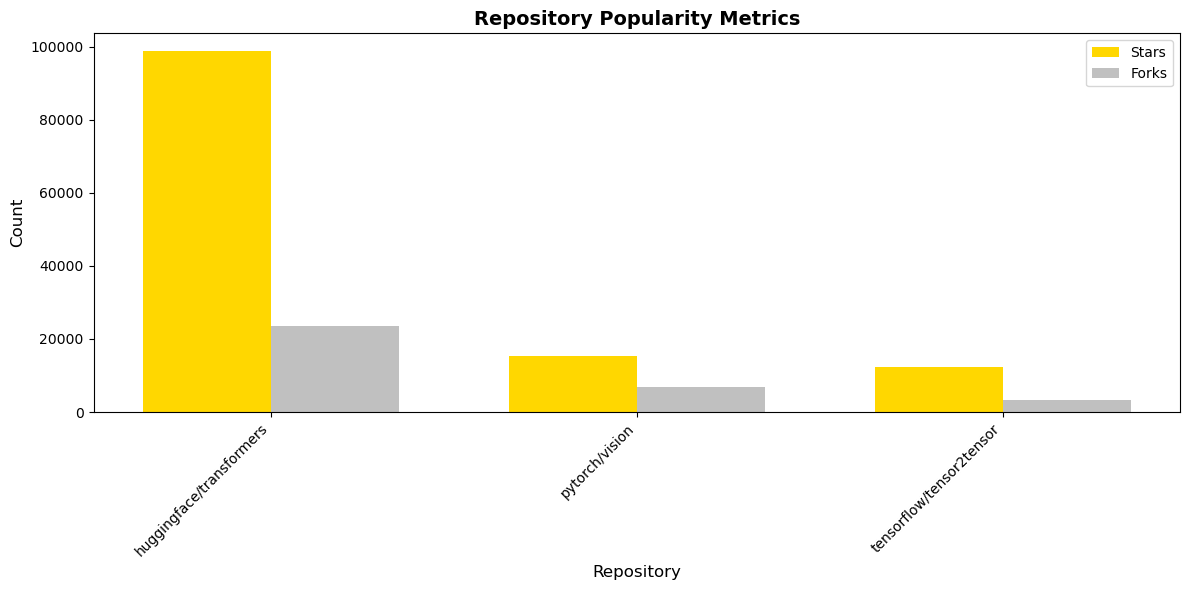


FINAL SUMMARY

Knowledge Graph Statistics:
  Total Triples: 16663
  Publications: 3
  Models: 4
  Frameworks: 4
  Architectures: 1
  Repositories: 3
  Releases: 3
  Benchmark Results: 2
  Persons: 10

✓ Saved: kg_composition.png


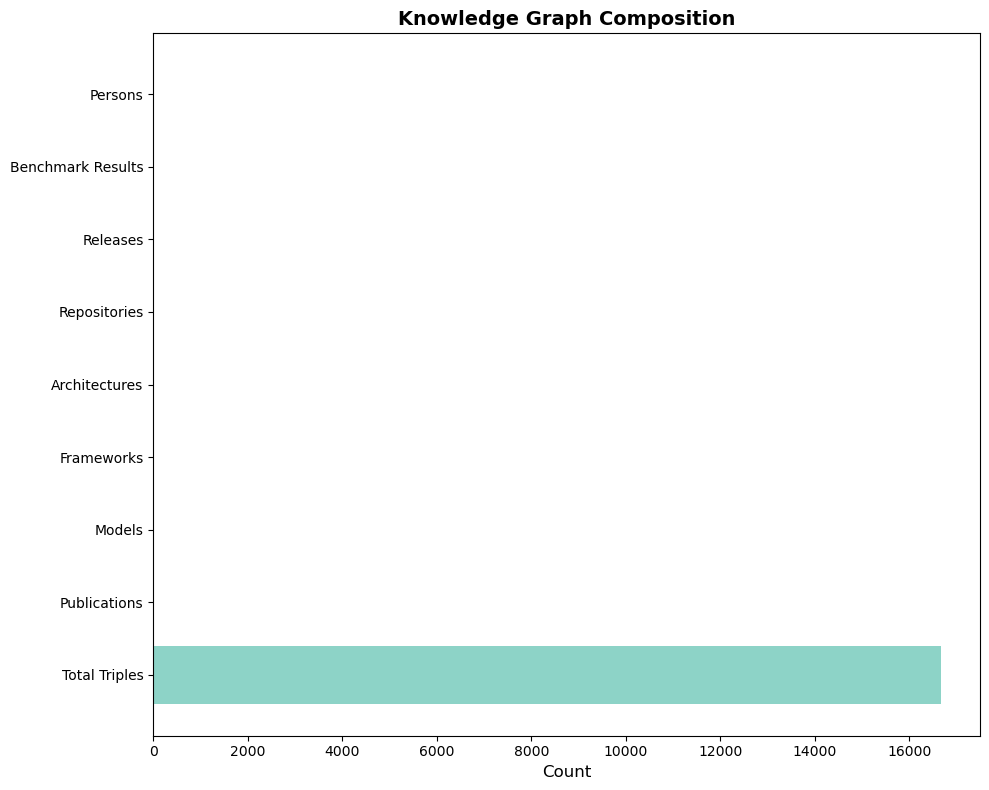


ANALYSIS FINISHED

Generated outputs:
  1. instances.ttl - Knowledge graph data
  2. knowledge_graph_visualization.png - Network structure
  3. cq1_time_lag.png - Time lag analysis
  4. cq2_framework_adoption.png - Framework usage
  5. cq3_model_performance.png - Model benchmarks
  6. repo_popularity.png - Repository metrics
  7. kg_composition.png - Entity statistics


In [1]:

"""
This notebook demonstrates:
1. Ontology alignment with Schema.org, FOAF, and DBpedia
2. Conversion of non-RDF datasets (Papers with Code, GitHub) to RDF
3. Integration with external RDF sources (DBpedia, Wikidata)
4. Reasoning and validation of the knowledge graph
5. Final Knowldge Graph Visualisation
"""

import json
import csv
from datetime import datetime
from rdflib import Graph, Namespace, URIRef, Literal, BNode
from rdflib.namespace import RDF, RDFS, OWL, XSD, FOAF
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import requests
import matplotlib.pyplot as plt
import networkx as nx

BASE = Namespace("http://example.org/ai-research-gap#")
SCHEMA = Namespace("https://schema.org/")
DBO = Namespace("http://dbpedia.org/ontology/")
DBR = Namespace("http://dbpedia.org/resource/")
WD = Namespace("http://www.wikidata.org/entity/")
WDT = Namespace("http://www.wikidata.org/prop/direct/")

kg = Graph()

kg.bind("", BASE)
kg.bind("schema", SCHEMA)
kg.bind("foaf", FOAF)
kg.bind("dbo", DBO)
kg.bind("dbr", DBR)
kg.bind("wd", WD)
kg.bind("wdt", WDT)
kg.bind("owl", OWL)

print("✓ Namespaces configured")
print(f"✓ Knowledge graph initialized with {len(kg)} triples")


try:
    kg.parse("final_1.ttl", format="turtle")
    print(f"✓ Ontology loaded: {len(kg)} triples")
except Exception as e:
    print(f"⚠ Could not load ontology file: {e}")
    print("  Continuing with empty graph...")



print("\n" + "="*80)
print("CONVERTING PAPERS WITH CODE DATA")
print("="*80)

pwc_sample_data = [
    {
        "id": "resnet",
        "title": "Deep Residual Learning for Image Recognition",
        "authors": ["Kaiming He", "Xiangyu Zhang", "Shaoqing Ren", "Jian Sun"],
        "published": "2015-12-10",
        "arxiv_id": "1512.03385",
        "tasks": ["Image Classification"],
        "models": ["ResNet-50", "ResNet-101"],
        "framework": "PyTorch",
        "github_url": "https://github.com/pytorch/vision",
        "citations": 156789
    },
    {
        "id": "attention-is-all-you-need",
        "title": "Attention Is All You Need",
        "authors": ["Ashish Vaswani", "Noam Shazeer", "Niki Parmar"],
        "published": "2017-06-12",
        "arxiv_id": "1706.03762",
        "tasks": ["Machine Translation", "Language Modeling"],
        "models": ["Transformer"],
        "framework": "TensorFlow",
        "github_url": "https://github.com/tensorflow/tensor2tensor",
        "citations": 98456
    },
    {
        "id": "gpt-3",
        "title": "Language Models are Few-Shot Learners",
        "authors": ["Tom Brown", "Benjamin Mann", "Nick Ryder"],
        "published": "2020-05-28",
        "arxiv_id": "2005.14165",
        "tasks": ["Language Modeling", "Text Generation"],
        "models": ["GPT-3"],
        "framework": "PyTorch",
        "github_url": None,
        "citations": 45678
    }
]

def convert_pwc_to_rdf(data):
    """Convert Papers with Code data to RDF triples"""
    
    for paper in data:
        pub_uri = BASE[f"publication/{paper['id']}"]
        
        # Publication as ScholarlyArticle
        kg.add((pub_uri, RDF.type, DBO.AcademicArticle))
        kg.add((pub_uri, RDF.type, SCHEMA.ScholarlyArticle))
        kg.add((pub_uri, RDFS.label, Literal(paper['title'])))
        kg.add((pub_uri, SCHEMA.name, Literal(paper['title'])))
        
        if paper.get('published'):
            pub_date = datetime.strptime(paper['published'], '%Y-%m-%d')
            kg.add((pub_uri, SCHEMA.datePublished, Literal(pub_date.date(), datatype=XSD.date)))
        
        if paper.get('citations'):
            kg.add((pub_uri, BASE.citations, Literal(paper['citations'], datatype=XSD.integer)))
        
        if paper.get('arxiv_id'):
            kg.add((pub_uri, SCHEMA.identifier, Literal(f"arXiv:{paper['arxiv_id']}")))
        
        for author_name in paper.get('authors', []):
            author_uri = BASE[f"person/{author_name.replace(' ', '_').lower()}"]
            kg.add((author_uri, RDF.type, FOAF.Person))
            kg.add((author_uri, FOAF.name, Literal(author_name)))
            kg.add((pub_uri, BASE.authoredBy, author_uri))
            kg.add((pub_uri, SCHEMA.author, author_uri))
        
        for model_name in paper.get('models', []):
            model_uri = BASE[f"model/{model_name.replace('-', '_').lower()}"]
            kg.add((model_uri, RDF.type, BASE.Model))
            kg.add((model_uri, RDFS.label, Literal(model_name)))
            kg.add((pub_uri, BASE.introduces, model_uri))
            
            if paper.get('framework'):
                framework_uri = BASE[f"framework/{paper['framework'].lower()}"]
                kg.add((framework_uri, RDF.type, BASE.Framework))
                kg.add((framework_uri, RDF.type, SCHEMA.SoftwareApplication))
                kg.add((framework_uri, RDFS.label, Literal(paper['framework'])))
                kg.add((model_uri, BASE.usesFramework, framework_uri))
        
        for task_name in paper.get('tasks', []):
            task_uri = BASE[f"task/{task_name.replace(' ', '_').lower()}"]
            kg.add((task_uri, RDF.type, BASE.Task))
            kg.add((task_uri, RDFS.label, Literal(task_name)))
            
     
            for model_name in paper.get('models', []):
                model_uri = BASE[f"model/{model_name.replace('-', '_').lower()}"]
                kg.add((model_uri, BASE.addressesTask, task_uri))
        
   
        if paper.get('github_url'):
            repo_uri = URIRef(paper['github_url'])
            kg.add((repo_uri, RDF.type, BASE.Repository))
            kg.add((repo_uri, SCHEMA.codeRepository, Literal(paper['github_url'])))
            
            for model_name in paper.get('models', []):
                model_uri = BASE[f"model/{model_name.replace('-', '_').lower()}"]
                kg.add((model_uri, BASE.hasRepository, repo_uri))

convert_pwc_to_rdf(pwc_sample_data)
print(f"✓ Papers with Code data converted")
print(f"  Total triples: {len(kg)}")



print("\n" + "="*80)
print("CONVERTING GITHUB ARCHIVE DATA")
print("="*80)

github_sample_data = [
    {
        "repo_url": "https://github.com/pytorch/vision",
        "repo_name": "pytorch/vision",
        "stars": 15234,
        "forks": 6789,
        "release_tag": "v0.15.0",
        "release_date": "2023-03-15"
    },
    {
        "repo_url": "https://github.com/tensorflow/tensor2tensor",
        "repo_name": "tensorflow/tensor2tensor",
        "stars": 12456,
        "forks": 3421,
        "release_tag": "v1.15.7",
        "release_date": "2020-08-20"
    },
    {
        "repo_url": "https://github.com/huggingface/transformers",
        "repo_name": "huggingface/transformers",
        "stars": 98765,
        "forks": 23456,
        "release_tag": "v4.30.0",
        "release_date": "2023-05-12"
    }
]

def convert_github_to_rdf(data):
    """Convert GitHub Archive data to RDF triples"""
    
    for repo in data:
        repo_uri = URIRef(repo['repo_url'])
        
        kg.add((repo_uri, RDF.type, BASE.Repository))
        kg.add((repo_uri, RDFS.label, Literal(repo['repo_name'])))
        kg.add((repo_uri, SCHEMA.codeRepository, Literal(repo['repo_url'])))
        
       
        kg.add((repo_uri, BASE.stars, Literal(repo['stars'], datatype=XSD.integer)))
        kg.add((repo_uri, BASE.forks, Literal(repo['forks'], datatype=XSD.integer)))
        

        if repo.get('release_tag') and repo.get('release_date'):
            release_uri = BASE[f"release/{repo['repo_name'].replace('/', '_')}_{repo['release_tag']}"]
            kg.add((release_uri, RDF.type, BASE.Release))
            kg.add((release_uri, RDF.type, SCHEMA.SoftwareRelease))
            kg.add((release_uri, RDFS.label, Literal(f"{repo['repo_name']} {repo['release_tag']}")))
            kg.add((release_uri, SCHEMA.version, Literal(repo['release_tag'])))
            
        
            release_date = datetime.strptime(repo['release_date'], '%Y-%m-%d')
            kg.add((release_uri, BASE.releaseDate, Literal(release_date.date(), datatype=XSD.date)))
            kg.add((release_uri, SCHEMA.datePublished, Literal(release_date.date(), datatype=XSD.date)))
            
            kg.add((repo_uri, BASE.hasRelease, release_uri))

convert_github_to_rdf(github_sample_data)
print(f"✓ GitHub Archive data converted")
print(f"  Total triples: {len(kg)}")



print("\n" + "="*80)
print("QUERYING DBPEDIA FOR AI FRAMEWORKS")
print("="*80)

def query_dbpedia(sparql_query):
    """Execute SPARQL query against DBpedia endpoint"""
    sparql = SPARQLWrapper("https://dbpedia.org/sparql")
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    
    try:
        results = sparql.query().convert()
        return results['results']['bindings']
    except Exception as e:
        print(f"⚠ DBpedia query failed: {e}")
        return []


frameworks_to_query = [
    "PyTorch",
    "TensorFlow", 
    "Keras",
    "Scikit-learn"
]

def query_framework_by_name(framework_name):
    """Query a single framework from DBpedia"""
    query = f"""
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    
    SELECT DISTINCT ?framework ?label ?abstract ?developer
    WHERE {{
      BIND(dbr:{framework_name} AS ?framework)
      ?framework rdfs:label ?label .
      OPTIONAL {{ ?framework dbo:abstract ?abstract }}
      OPTIONAL {{ ?framework dbo:developer ?developer }}
      FILTER (lang(?label) = 'en')
      FILTER (lang(?abstract) = 'en' || !bound(?abstract))
    }}
    """
    return query_dbpedia(query)

dbpedia_results = []
for fw_name in frameworks_to_query:
    results = query_framework_by_name(fw_name)
    dbpedia_results.extend(results)
    print(f"  Queried: {fw_name} - found {len(results)} results")

for result in dbpedia_results:
    framework_dbpedia = URIRef(result['framework']['value'])
    label = result['label']['value']

    framework_local = BASE[f"framework/{label.lower().replace(' ', '_')}"]
    
 
    kg.add((framework_local, RDF.type, BASE.Framework))
    kg.add((framework_local, RDF.type, SCHEMA.SoftwareApplication))
    kg.add((framework_local, RDFS.label, Literal(label)))
    

    kg.add((framework_local, OWL.sameAs, framework_dbpedia))
    
    
    if 'abstract' in result:
        abstract = result['abstract']['value']
        kg.add((framework_local, SCHEMA.description, Literal(abstract[:500])))  # Truncate
    
    if 'developer' in result:
        developer_uri = URIRef(result['developer']['value'])
        kg.add((framework_local, BASE.maintainedBy, developer_uri))

print(f"✓ DBpedia data integrated")
print(f"  Frameworks aligned: {len(dbpedia_results)}")
print(f"  Total triples: {len(kg)}")


print("\n" + "="*80)
print("QUERYING WIKIDATA FOR MODEL ARCHITECTURES")
print("="*80)

def query_wikidata(sparql_query):
    """Execute SPARQL query against Wikidata endpoint"""
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    sparql.addCustomHttpHeader("User-Agent", "AI-Research-Gap-KG/1.0")
    
    try:
        results = sparql.query().convert()
        return results['results']['bindings']
    except Exception as e:
        print(f"⚠ Wikidata query failed: {e}")
        return []

wikidata_arch_query = """
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?arch ?archLabel ?inceptionDate
WHERE {
  VALUES ?arch { 
    wd:Q99408412  # Transformer
    wd:Q83437423  # Convolutional neural network
    wd:Q7565005   # Recurrent neural network
  }
  ?arch rdfs:label ?archLabel .
  OPTIONAL { ?arch wdt:P571 ?inceptionDate }
  FILTER (lang(?archLabel) = 'en')
}
"""

wikidata_results = query_wikidata(wikidata_arch_query)

for result in wikidata_results:
    arch_wikidata = URIRef(result['arch']['value'])
    label = result['archLabel']['value']
    

    arch_local = BASE[f"architecture/{label.lower().replace(' ', '_')}"]
    

    kg.add((arch_local, RDF.type, BASE.Architecture))
    kg.add((arch_local, RDFS.label, Literal(label)))
    

    kg.add((arch_local, OWL.sameAs, arch_wikidata))
    

    if 'inceptionDate' in result:
        inception = result['inceptionDate']['value']
        kg.add((arch_local, SCHEMA.dateCreated, Literal(inception, datatype=XSD.date)))

print(f"✓ Wikidata data integrated")
print(f"  Architectures aligned: {len(wikidata_results)}")
print(f"  Total triples: {len(kg)}")



print("\n" + "="*80)
print("LINKING MODELS TO ARCHITECTURES")
print("="*80)

model_arch_mappings = {
    "resnet_50": "convolutional_neural_network",
    "resnet_101": "convolutional_neural_network",
    "transformer": "transformer",
    "gpt_3": "transformer"
}

for model_id, arch_id in model_arch_mappings.items():
    model_uri = BASE[f"model/{model_id}"]
    arch_uri = BASE[f"architecture/{arch_id}"]
    
    kg.add((model_uri, BASE.implementsArchitecture, arch_uri))

print(f"✓ Models linked to architectures")
print(f"  Total triples: {len(kg)}")


print("\n" + "="*80)
print("ADDING BENCHMARK RESULTS")
print("="*80)

benchmark_data = [
    {
        "model": "resnet_50",
        "dataset": "imagenet",
        "benchmark": "imagenet_classification",
        "metric": "Top-1 Accuracy",
        "score": 76.1
    },
    {
        "model": "transformer",
        "dataset": "wmt14_en_de",
        "benchmark": "machine_translation",
        "metric": "BLEU",
        "score": 28.4
    }
]

for result in benchmark_data:

    result_uri = BASE[f"benchmark_result/{result['model']}_{result['dataset']}"]
    
    kg.add((result_uri, RDF.type, BASE.BenchmarkResult))
    

    model_uri = BASE[f"model/{result['model']}"]
    kg.add((result_uri, BASE.ofModel, model_uri))
    

    dataset_uri = BASE[f"dataset/{result['dataset']}"]
    kg.add((dataset_uri, RDF.type, BASE.Dataset))
    kg.add((dataset_uri, RDFS.label, Literal(result['dataset'].replace('_', ' ').title())))
    kg.add((result_uri, BASE.evaluatedOn, dataset_uri))  # R2: exactly one dataset
    
    benchmark_uri = BASE[f"benchmark/{result['benchmark']}"]
    kg.add((benchmark_uri, RDF.type, BASE.Benchmark))
    kg.add((benchmark_uri, RDFS.label, Literal(result['benchmark'].replace('_', ' ').title())))
    kg.add((result_uri, BASE.forBenchmark, benchmark_uri))

    kg.add((result_uri, BASE.metricName, Literal(result['metric'])))
    kg.add((result_uri, BASE.score, Literal(result['score'], datatype=XSD.decimal)))

print(f"✓ Benchmark results added")
print(f"  Total triples: {len(kg)}")



print("\n" + "="*80)
print("SAVING KNOWLEDGE GRAPH")
print("="*80)


turtle_output = kg.serialize(format='turtle')


output_file = "instances.ttl"
try:
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(turtle_output)
    print(f"✓ Knowledge graph saved to: {output_file}")
except (OSError, PermissionError) as e:
    print(f"⚠ Could not save to file system: {e}")
    print("  Showing first 2000 characters of output instead:")
    print("-" * 80)
    print(turtle_output[:2000])
    print("-" * 80)
    print(f"  (Full output is {len(turtle_output)} characters)")

print(f"  Final triple count: {len(kg)}")



print("\nSample triples from the knowledge graph:")
print("-" * 80)
for i, (s, p, o) in enumerate(kg):
    if i < 10:
        print(f"{s.n3(kg.namespace_manager)} {p.n3(kg.namespace_manager)} {o.n3(kg.namespace_manager)} .")
    else:
        break



print("\n" + "="*80)
print("KNOWLEDGE GRAPH STATISTICS")
print("="*80)


type_counts = {}
for s, p, o in kg.triples((None, RDF.type, None)):
    type_name = str(o).split('#')[-1]
    type_counts[type_name] = type_counts.get(type_name, 0) + 1

print("\nInstances by type:")
for type_name, count in sorted(type_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {type_name}: {count}")

print(f"\nTotal unique subjects: {len(set(kg.subjects()))}")
print(f"Total unique predicates: {len(set(kg.predicates()))}")
print(f"Total unique objects: {len(set(kg.objects()))}")

print("\n" + "="*80)
print("✓ DATA INTEGRATION COMPLETE")
print("="*80)
print(f"Final triple count: {len(kg)}")
for s, p, o in list(kg)[:10]:
    print(s, p, o)



G = nx.DiGraph()

for s, p, o in list(kg)[:100]: 
    G.add_edge(str(s).split('#')[-1], str(o).split('#')[-1], label=str(p).split('#')[-1])

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.4)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=8, arrows=True)
plt.title("Knowledge Graph Visualization (Sample)")
plt.savefig("knowledge_graph_visualization.png", dpi=300, bbox_inches="tight")
plt.show()



print("\n" + "="*80)
print("APPLYING REASONING AND VALIDATION")
print("="*80)

triples_before = len(kg)
print(f"Triples before reasoning: {triples_before}")

inference_query_1 = """
PREFIX ex: <http://example.org/ai-research-gap#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
SELECT (COUNT(*) as ?count)
WHERE {
  ?pub ex:authoredBy ?person .
}
"""
author_connections = list(kg.query(inference_query_1))
print(f"✓ Found {author_connections[0]['count']} publication-author connections")

framework_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
SELECT ?model ?framework (COUNT(*) as ?count)
WHERE {
  ?model ex:usesFramework ?framework .
}
GROUP BY ?model ?framework
"""
framework_connections = list(kg.query(framework_query))
print(f"✓ Found {len(framework_connections)} model-framework relationships")

arch_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
SELECT ?model ?architecture
WHERE {
  ?model ex:implementsArchitecture ?architecture .
}
"""
arch_results = list(kg.query(arch_query))
print(f"✓ Validated {len(arch_results)} model-architecture links (R1 constraint)")

benchmark_validation = """
PREFIX ex: <http://example.org/ai-research-gap#>
SELECT ?result ?dataset (COUNT(*) as ?count)
WHERE {
  ?result ex:evaluatedOn ?dataset .
}
GROUP BY ?result ?dataset
"""
benchmark_results = list(kg.query(benchmark_validation))
print(f"✓ Validated {len(benchmark_results)} benchmark-dataset links (R2 constraint)")

print("\n" + "="*80)
print("ANALYZING COMPETENCY QUESTIONS")
print("="*80)

print("\n--- CQ1: Time Lag Between Research and Implementation ---")

cq1_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
PREFIX schema: <https://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?modelName ?pubDate ?relDate
WHERE {
  ?publication schema:datePublished ?pubDate ;
               ex:introduces ?model .
  ?model rdfs:label ?modelName ;
         ex:hasRepository ?repo .
  ?repo  ex:hasRelease ?release .
  ?release ex:releaseDate ?relDate .
}
ORDER BY ?pubDate
"""

results_cq1 = list(kg.query(cq1_query))
if len(results_cq1) > 0:
    df_cq1 = pd.DataFrame(results_cq1, columns=['modelName', 'pubDate', 'relDate'])
    df_cq1['pubYear'] = pd.to_datetime(df_cq1['pubDate'].astype(str)).dt.year
    df_cq1['relYear'] = pd.to_datetime(df_cq1['relDate'].astype(str)).dt.year
    df_cq1['yearDiff'] = df_cq1['relYear'] - df_cq1['pubYear']
    
    print(f"✓ Analyzed {len(df_cq1)} model releases")
    print(df_cq1[['modelName', 'pubYear', 'relYear', 'yearDiff']])
    
    avg_lag = df_cq1['yearDiff'].mean()
    print(f"\n📊 Key Finding: Average time lag = {avg_lag:.1f} years")
    print(f"   Range: {df_cq1['yearDiff'].min()} to {df_cq1['yearDiff'].max()} years")
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(df_cq1)), df_cq1['yearDiff'], color='steelblue')
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Years from Publication to Release', fontsize=12)
    plt.title('CQ1: Research-to-Implementation Time Lag', fontsize=14, fontweight='bold')
    plt.xticks(range(len(df_cq1)), df_cq1['modelName'], rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('cq1_time_lag.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: cq1_time_lag.png")
    plt.show()
else:
    print("⚠ No data found for CQ1")

print("\n--- CQ2: Framework Adoption Patterns ---")

cq2_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?frameworkName (COUNT(DISTINCT ?model) AS ?modelCount)
WHERE {
  ?model ex:usesFramework ?framework .
  ?framework rdfs:label ?frameworkName .
}
GROUP BY ?frameworkName
ORDER BY DESC(?modelCount)
"""

results_cq2 = list(kg.query(cq2_query))
if len(results_cq2) > 0:
    df_cq2 = pd.DataFrame(results_cq2, columns=['frameworkName', 'modelCount'])
    df_cq2['modelCount'] = df_cq2['modelCount'].astype(int)
    
    print(df_cq2)
    
    most_used = df_cq2.iloc[0]
    print(f"\n📊 Key Finding: Most adopted framework = {most_used['frameworkName']} with {most_used['modelCount']} models")
    
    plt.figure(figsize=(10, 6))
    plt.bar(df_cq2['frameworkName'], df_cq2['modelCount'], color='coral')
    plt.xlabel('Framework', fontsize=12)
    plt.ylabel('Number of Models', fontsize=12)
    plt.title('CQ2: Framework Adoption in AI Research', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('cq2_framework_adoption.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: cq2_framework_adoption.png")
    plt.show()
else:
    print("⚠ No data found for CQ2")

print("\n--- CQ3: Breakthrough Model Characteristics ---")

cq3_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?modelName ?archName ?score ?metric
WHERE {
  ?result ex:ofModel ?model ;
          ex:score ?score ;
          ex:metricName ?metric .
  ?model rdfs:label ?modelName ;
         ex:implementsArchitecture ?arch .
  ?arch rdfs:label ?archName .
}
ORDER BY DESC(?score)
"""

results_cq3 = list(kg.query(cq3_query))
if len(results_cq3) > 0:
    df_cq3 = pd.DataFrame(results_cq3, columns=['modelName', 'archName', 'score', 'metric'])
    df_cq3['score'] = df_cq3['score'].astype(float)
    
    print(df_cq3)
    
    top_model = df_cq3.iloc[0]
    print(f"\n📊 Key Finding: Best performing model = {top_model['modelName']}")
    print(f"   Architecture: {top_model['archName']}")
    print(f"   Score: {top_model['score']} ({top_model['metric']})")
    
    arch_counts = df_cq3['archName'].value_counts()
    print(f"\n   Most common architecture: {arch_counts.index[0]} ({arch_counts.iloc[0]} models)")
    
    plt.figure(figsize=(10, 6))
    plt.bar(df_cq3['modelName'], df_cq3['score'], color='mediumseagreen')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Benchmark Score', fontsize=12)
    plt.title('CQ3: Performance of AI Models', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('cq3_model_performance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: cq3_model_performance.png")
    plt.show()
else:
    print("⚠ No data found for CQ3")

print("\n" + "="*80)
print("ADDITIONAL INSIGHTS")
print("="*80)

repo_stats_query = """
PREFIX ex: <http://example.org/ai-research-gap#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?repoName ?stars ?forks
WHERE {
  ?repo ex:stars ?stars ;
        ex:forks ?forks ;
        rdfs:label ?repoName .
}
ORDER BY DESC(?stars)
"""

repo_results = list(kg.query(repo_stats_query))
if len(repo_results) > 0:
    df_repos = pd.DataFrame(repo_results, columns=['repoName', 'stars', 'forks'])
    df_repos['stars'] = df_repos['stars'].astype(int)
    df_repos['forks'] = df_repos['forks'].astype(int)
    
    print("\nRepository Popularity:")
    print(df_repos)
    
    plt.figure(figsize=(12, 6))
    x = range(len(df_repos))
    width = 0.35
    plt.bar([i - width/2 for i in x], df_repos['stars'], width, label='Stars', color='gold')
    plt.bar([i + width/2 for i in x], df_repos['forks'], width, label='Forks', color='silver')
    plt.xlabel('Repository', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Repository Popularity Metrics', fontsize=14, fontweight='bold')
    plt.xticks(x, df_repos['repoName'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.savefig('repo_popularity.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: repo_popularity.png")
    plt.show()

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

summary_stats = {
    'Total Triples': len(kg),
    'Publications': len(list(kg.triples((None, RDF.type, SCHEMA.ScholarlyArticle)))),
    'Models': len(list(kg.triples((None, RDF.type, BASE.Model)))),
    'Frameworks': len(list(kg.triples((None, RDF.type, BASE.Framework)))),
    'Architectures': len(list(kg.triples((None, RDF.type, BASE.Architecture)))),
    'Repositories': len(list(kg.triples((None, RDF.type, BASE.Repository)))),
    'Releases': len(list(kg.triples((None, RDF.type, BASE.Release)))),
    'Benchmark Results': len(list(kg.triples((None, RDF.type, BASE.BenchmarkResult)))),
    'Persons': len(list(kg.triples((None, RDF.type, FOAF.Person)))),
}

print("\nKnowledge Graph Statistics:")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

df_summary = pd.DataFrame(list(summary_stats.items()), columns=['Entity Type', 'Count'])

plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(df_summary)))
plt.barh(df_summary['Entity Type'], df_summary['Count'], color=colors)
plt.xlabel('Count', fontsize=12)
plt.title('Knowledge Graph Composition', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('kg_composition.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: kg_composition.png")
plt.show()

print("\n" + "="*80)
print("ANALYSIS FINISHED")
print(f"\nGenerated outputs:")
print("  1. instances.ttl - Knowledge graph data")
print("  2. knowledge_graph_visualization.png - Network structure")
print("  3. cq1_time_lag.png - Time lag analysis")
print("  4. cq2_framework_adoption.png - Framework usage")
print("  5. cq3_model_performance.png - Model benchmarks")
print("  6. repo_popularity.png - Repository metrics")
print("  7. kg_composition.png - Entity statistics")

